# plotnine

R语言的强大之处在ggplot2，通过使用gg语法来绘图，即绘图元素分层分元素进行。

plotnine是python版本的ggplot2（不完全版本）

- 采用图层的设计方式，便于使用结构化思维实现数据的可视化，有明确的起始语句与终止语句，图层间使用+连接
- 表征数据与图形细节分离（数据与图形细节低耦合）


## plotnine 案例一：plonine展示

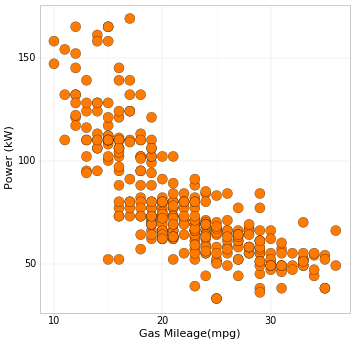

<ggplot: (-9223371933421045620)>


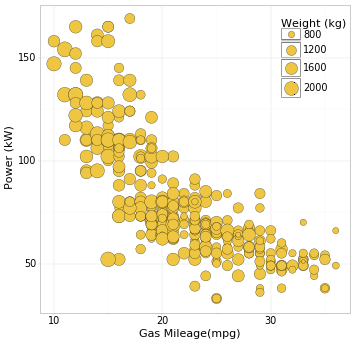

<ggplot: (-9223371933420931776)>


In [1]:
import pandas as pd
import numpy as np
from plotnine import *


mydata=pd.read_csv("../data/Bubble_Data.csv")
Colnames=mydata.columns.values.tolist()

base_plot=(ggplot(mydata, aes('Gas Mileage(mpg)','Power (kW)')) 
#其气泡的颜色填充由Class映射，大小由age映射
+geom_point(fill='#FE7A00',colour="black",size=8,stroke=0.2,alpha=1) #
#+scale_size_continuous(range=[3,12])
+theme_light()
+theme(
    #text=element_text(size=15,face="plain",color="black"),
    axis_title=element_text(size=16,face="plain",color="black"),
    axis_text = element_text(size=14,face="plain",color="black"),
    legend_text=element_text(size=14,face="plain",color="black"),
    legend_title=element_text(size=16,face="plain",color="black"),
    legend_background=element_blank(),
    #legend_position='none',
    legend_position = (0.81,0.75),
    figure_size = (8, 8),
    dpi = 50
))
print(base_plot)
#base_plot.save('Bubble1.pdf')


base_plot=(ggplot(mydata, aes('Gas Mileage(mpg)','Power (kW)',size='Weight (kg)')) 
#其气泡的颜色填充由Class映射，大小由age映射
+geom_point(fill='#EEC642',colour="black",stroke=0.2,alpha=1) #size=7,
+scale_size_continuous(range=[3,12])
+theme_light()
+theme(
    #text=element_text(size=15,face="plain",color="black"),
    axis_title=element_text(size=16,face="plain",color="black"),
    axis_text = element_text(size=14,face="plain",color="black"),
    legend_text=element_text(size=14,face="plain",color="black"),
    legend_title=element_text(size=16,face="plain",color="black"),
    legend_background=element_blank(),
    #legend_position='none',
    legend_position = (0.81,0.75),
    figure_size = (8, 8),
    dpi = 50
))
print(base_plot)
#base_plot.save('Bubble2.pdf')

## plotnine 基本语法规则

### 始于ggplot()函数

### 几何对象函数geom_XXX()
  用于指定画什么样的图形

- 连续型：geom_histogram() 统计直方图、geom_density() 核密度估计图、
- 离散型：geom_bar()柱形图
- X-离散型，Y-连续型：
    - geom_point() 散点图
    - geom_area() 面积图
    - geom_line() 折线图
    - geom_jitter() 散点抖动图
    - geom_smooth() 平滑曲线图
- X-离散-Y连续型：
    - geom_boxplot() 箱线图
    - geom_violin() 小提亲图
    - geom_dotplot() 点阵图
    - geom_col() 统计直方图
- X-离散-Y离散：
    - geom_count()二维统计直方图

### 统计变换函数：stat_xxx()

### 美学参数：绘图函数ggplot()和geom_xxx()中的属性值，用于调整美学效果
plotnine模拟了ggplot2中的gg语法。ggplot2是R的包，不仅具备典型的类特征，全部用函数拼接。所以语法有点**别致**。

- ggplot(data=NULL,mapping=aes()),函数中还可以添加如下参数设置，用于调整美学效果，具有绘图的全局优先级，可以被之后的geom_xxx()函数继承（修改）
- geom_xxx(data=NULL,mapping=aes()),geom内部同样具有data和mapping参数，但属于局部参数，仅作用于当前geom内部

- 颜色：
    - color/col/colour：点、线、填充区**轮廓（描边）** 的颜色
    - fill，填充区的颜色
    - alpha，颜色的透明度
- size，点子大小，单位mm
- line，线的宽度，单位mm
- linetype，线条类型
    - 0 = blank
    - 1 = solid
    - 2 = dashed
    - 3 = dotted
    - 4 = dotdash
    - 5 = longdash
### 主题系统theme_xxx()
   plotnine有内置的几套主题风格系统，直接调用，方便绘图。简单罗列如下：
   - 适合PPT演示的：theme_grey()、theme_bw()
   - 适合学术论文发表的：theme_matplotlib()、theme_classic()
   - 其它的：theme_light()、theme_minimal()

## plotnine案例二：plotnine图形与主题

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


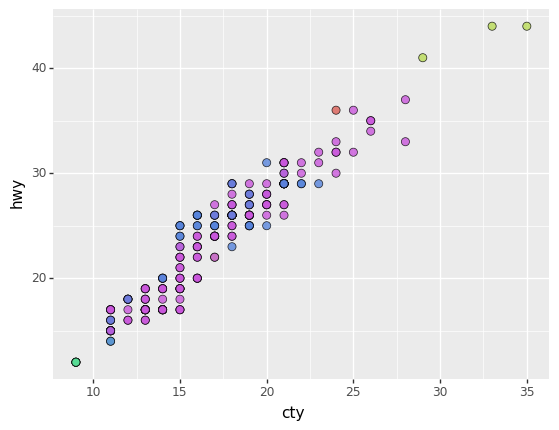

<ggplot: (-9223371933420708036)>

In [4]:
from plotnine import *
from plotnine.data import mpg #演示数据集

print(mpg.head(5))

plt = ggplot(mpg,aes('cty','hwy',fill='fl'))
plt += geom_point(size=3,stroke=0.3,alpha=0.8,show_legend=False)
#plotnine默认的主题是theme_grey()
plt

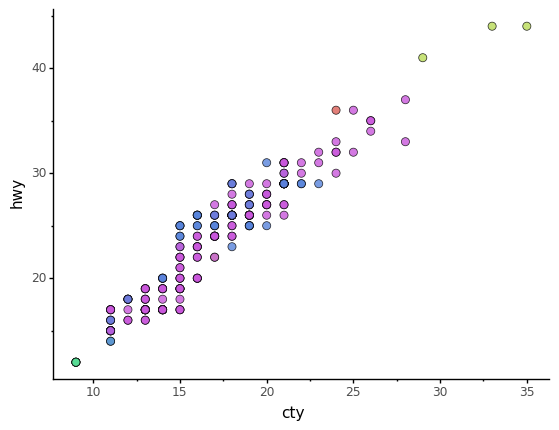

<ggplot: (-9223371933420708036)>

In [5]:
# 要修改theme，非常简单，加入新的theme就会覆盖掉原有的theme
plt += theme_classic()
plt

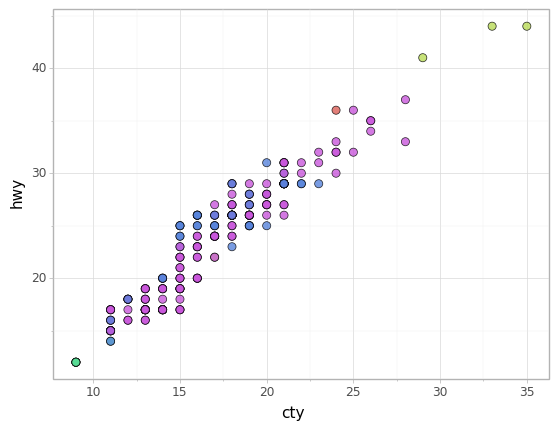

<ggplot: (-9223371933420708036)>

In [6]:
plt += theme_light()
plt

## 分面

简单的说就是子图。当表示多维度数据时，分面更容易展现数据规律



### plotnine案例三：分面

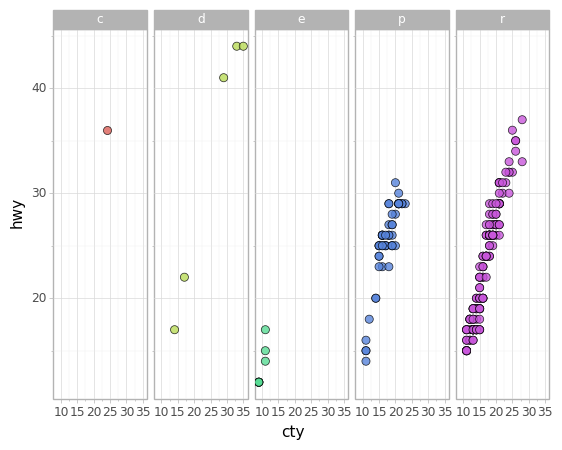

<ggplot: (-9223371933420742924)>

In [8]:
# 在原有的plt上直接叠加分面函数即可
plt + facet_grid('.~fl')

# 根据fl列值的不同分面，分面按列排布，即单行多列

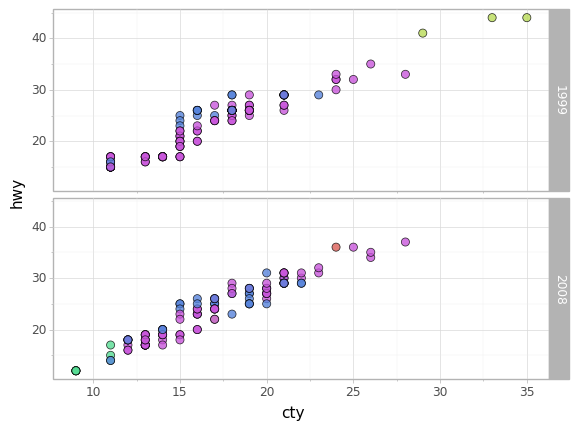

<ggplot: (-9223371933419518112)>

In [10]:
#根据year列值的不同，按行排布分面，即单列多行
plt + facet_grid('year~.')

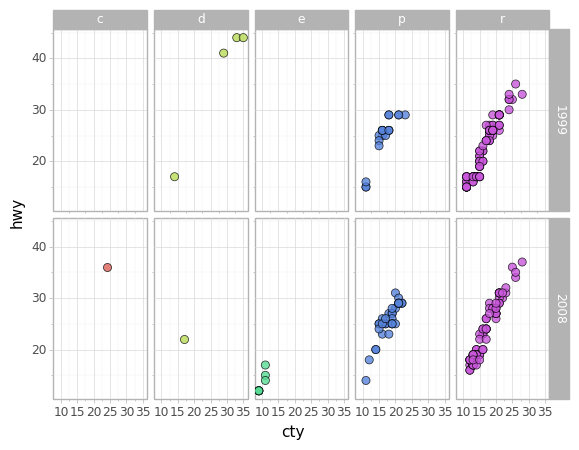

<ggplot: (-9223371933420903196)>

In [11]:
# 根据两个变量按行列矩阵排布分面
# 数据表的列也叫变量
plt + facet_grid('year~fl')

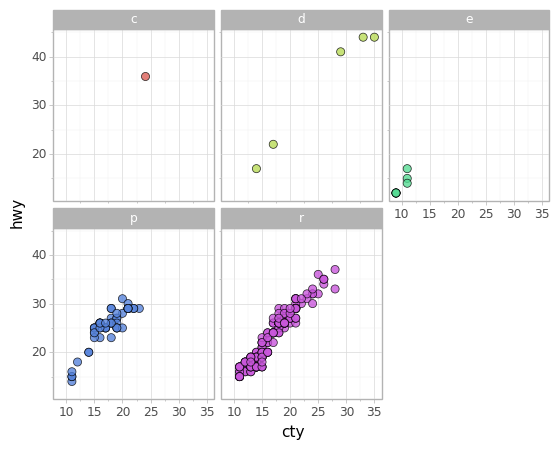

<ggplot: (-9223371933419009608)>

In [12]:
# 根据变量 按矩形排布
plt + facet_wrap('~fl')

In [ ]:
### 颜色模式
有时需要通过色阶体现变量的变化

        age       tau    Class       SOD  male
0  0.987624  6.297754  Control  5.609472     0
1  0.986667  6.270988  Control  5.723585     1
2  0.986702  6.152733  Control  5.771441     0
3  0.987163  6.623707  Control  5.655992     0
4  0.985465  5.740789  Control  5.509388     1


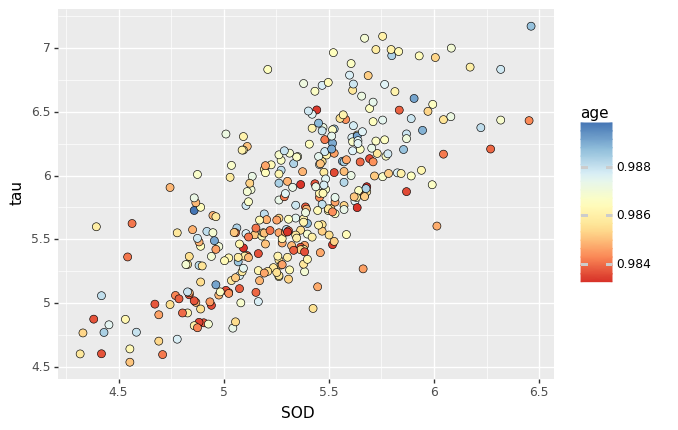

<ggplot: (-9223371933418671060)>

In [18]:
df=pd.read_csv("../data/Facet_Data.csv")
print(df.head(5))
# ggplot函数知名x、y以及填充色对应的变量
p1  =  ggplot(df, aes(x='SOD',y='tau',fill='age'))
p1 += geom_point(shape='o',color="black",size=3,stroke=0.25,alpha=1)

# 使用scale_fill_distiller函数指定颜色模式
p1 += scale_fill_distiller(type='div',palette="RdYlBu")

p1

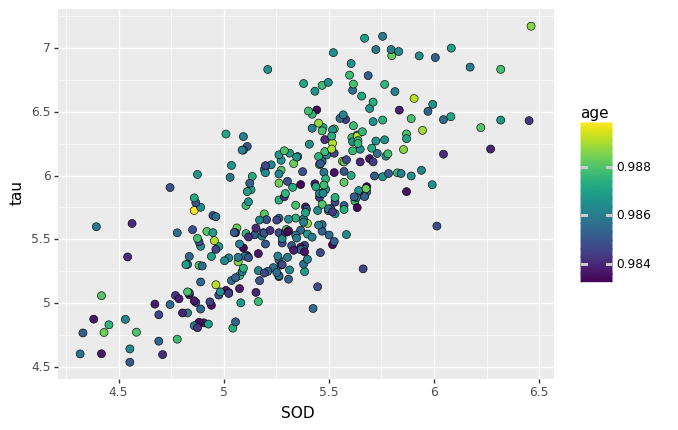

<ggplot: (-9223371933418500284)>

In [19]:
# 第二种方案

p2  = ggplot(df, aes(x='SOD',y='tau',fill='age'))
p2 += geom_point(shape='o',color="black",size=3,stroke=0.25,alpha=1)

# scale_fill_cmap指定颜色模式
p2 += scale_fill_cmap(name='viridis')

p2


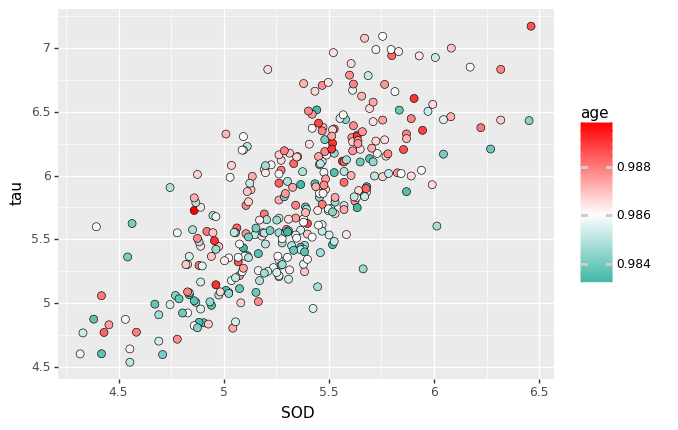

<ggplot: (-9223371933418501396)>

In [20]:
#第三种方案

p3  = ggplot(df, aes(x='SOD',y='tau',fill='age'))  
p3 += geom_point(shape='o',color="black",size=3, stroke=0.25,alpha=1)

#使用scale_fill_gradient2函数自定义连续的颜色条
p3 += scale_fill_gradient2(low="#00A08A",mid="white",high="#FF0000",midpoint = np.mean(df.age))

p3

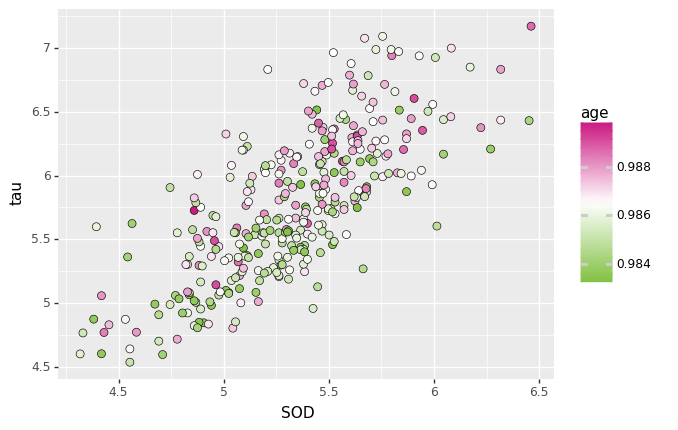

<ggplot: (-9223371933418458320)>

In [21]:
#第四种方案，使用scale_fill_gradientn()自定义填充颜色

p4  = ggplot(df, aes(x='SOD',y='tau',fill='age'))  
p4 += geom_point(shape='o',color="black",size=3, stroke=0.25, alpha=1)
p4 += scale_fill_gradientn(colors= ("#82C143","white","#CB1B81"))
p4

## 图表的基本类型

不论商业图表还是学术图表，要想得到完美的图表，需要反复思索如下4个问题（Nathan Yau）

- 你拥有什么样的数据？
- 你想表达什么样的数据信息？
- 你应该采取什么样的数据可视化方法？
- 你从图表中能获得什么样的数据信息？

其中关键时第三条，所以需要了解有哪些图表类型。
plotnine内置了96种图表类型，可分为6大类：类别比较、数据关系、数据分布、时间序列、局部整体、地理空间。